In [1]:
#!pip install simpy

In [2]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class JusticeSystem():
    def __init__(self, env) -> None:
        self.env = env

        # Random, hard-coded probability
        self.summoned_dismiss_prob = 0.01
        self.magistrate_dismiss_prob = 0.08
        self.magistrate_sentence_prob = 0. # This is after not dismissing. I.e., of all the legitimate cases, 30% is dismissed
        self.crown_dismiss_prob = 0.66 

        # list for logging
        self.dismissed_list = []
        self.sentenced_list = []

    # The entire justice process
    def justice(self, env):
        while True:
            # Track case progress
            self.summoned_case = True
            self.magistrate_case = False
            self.crown_case = False
            self.sentenced = False

            # Start date
            start_date = env.now

            # Case start
            if self.summoned_case:
                yield self.env.process(self.summoned())

            if self.magistrate_case:
                yield self.env.process(self.magistrate()) 
            
            if self.crown_case:
                yield self.env.process(self.crown())
            
            # End date
            end_date = env.now

            # Logging
            print(f'Our case takes {end_date - start_date} days')
            if self.sentenced:
                self.sentenced_list.append(end_date - start_date)
            else:
                self.dismissed_list.append(end_date - start_date)


    # The summoned process
    def summoned(self):
        # Case dismissed
        if np.random.uniform() < self.summoned_dismiss_prob:
            self.summoned_case = False
            yield self.env.timeout(
                max(1, round(np.random.normal(10, 5)))
            )
        
        # Case moved to magistrate
        else:
            self.summoned_case = False
            self.magistrate_case = True
            yield self.env.timeout(
                max(1, round(np.random.normal(10, 5)))
            ) 

    # The magistrate process
    def magistrate(self):
        # Cases dismissed
        if np.random.uniform() < self.magistrate_dismiss_prob:
            self.magistrate_case = False
            yield self.env.timeout(
                max(1, round(np.random.normal(10, 5)))
            )  

        # Cases sentenced
        elif np.random.uniform() < self.magistrate_sentence_prob:
            self.magistrate_case = False
            self.sentenced = True
            yield self.env.timeout(
                max(1, round(np.random.normal(10, 5)))
            )

        # Cases moved to crown court
        else:
            self.magistrate_case = False
            self.crown_case = True
            yield self.env.timeout(
                            max(1, round(np.random.normal(10, 5)))
                        )

    # the crown process
    def crown(self):
        # Cases dismissed
        if np.random.uniform() < self.crown_dismiss_prob:
            self.crown_case = False
            yield self.env.timeout(
                            np.lognormal(log(160, 2*log(3/2))
                        )

        # Cases sentenced
        else:
            self.crown_case = False
            self.sentenced = True
            yield self.env.timeout(
                            max(1, round(np.random.normal(10, 5)))
                        )


In [4]:
def simulate(env):
    global justice_system
    justice_system = JusticeSystem(env)
    env.process(justice_system.justice(env))
    
    yield env.timeout(0)

In [5]:
env = simpy.Environment()
env.process(simulate(env))
env.run(until=100000)

Our case takes 23 days
Our case takes 41 days
Our case takes 16 days
Our case takes 26 days
Our case takes 40 days
Our case takes 26 days
Our case takes 12 days
Our case takes 4 days
Our case takes 12 days
Our case takes 5 days
Our case takes 22 days
Our case takes 26 days
Our case takes 39 days
Our case takes 3 days
Our case takes 31 days
Our case takes 17 days
Our case takes 30 days
Our case takes 6 days
Our case takes 12 days
Our case takes 33 days
Our case takes 43 days
Our case takes 12 days
Our case takes 53 days
Our case takes 16 days
Our case takes 36 days
Our case takes 14 days
Our case takes 15 days
Our case takes 11 days
Our case takes 19 days
Our case takes 9 days
Our case takes 25 days
Our case takes 7 days
Our case takes 11 days
Our case takes 39 days
Our case takes 8 days
Our case takes 8 days
Our case takes 18 days
Our case takes 14 days
Our case takes 30 days
Our case takes 21 days
Our case takes 9 days
Our case takes 9 days
Our case takes 9 days
Our case takes 3 days


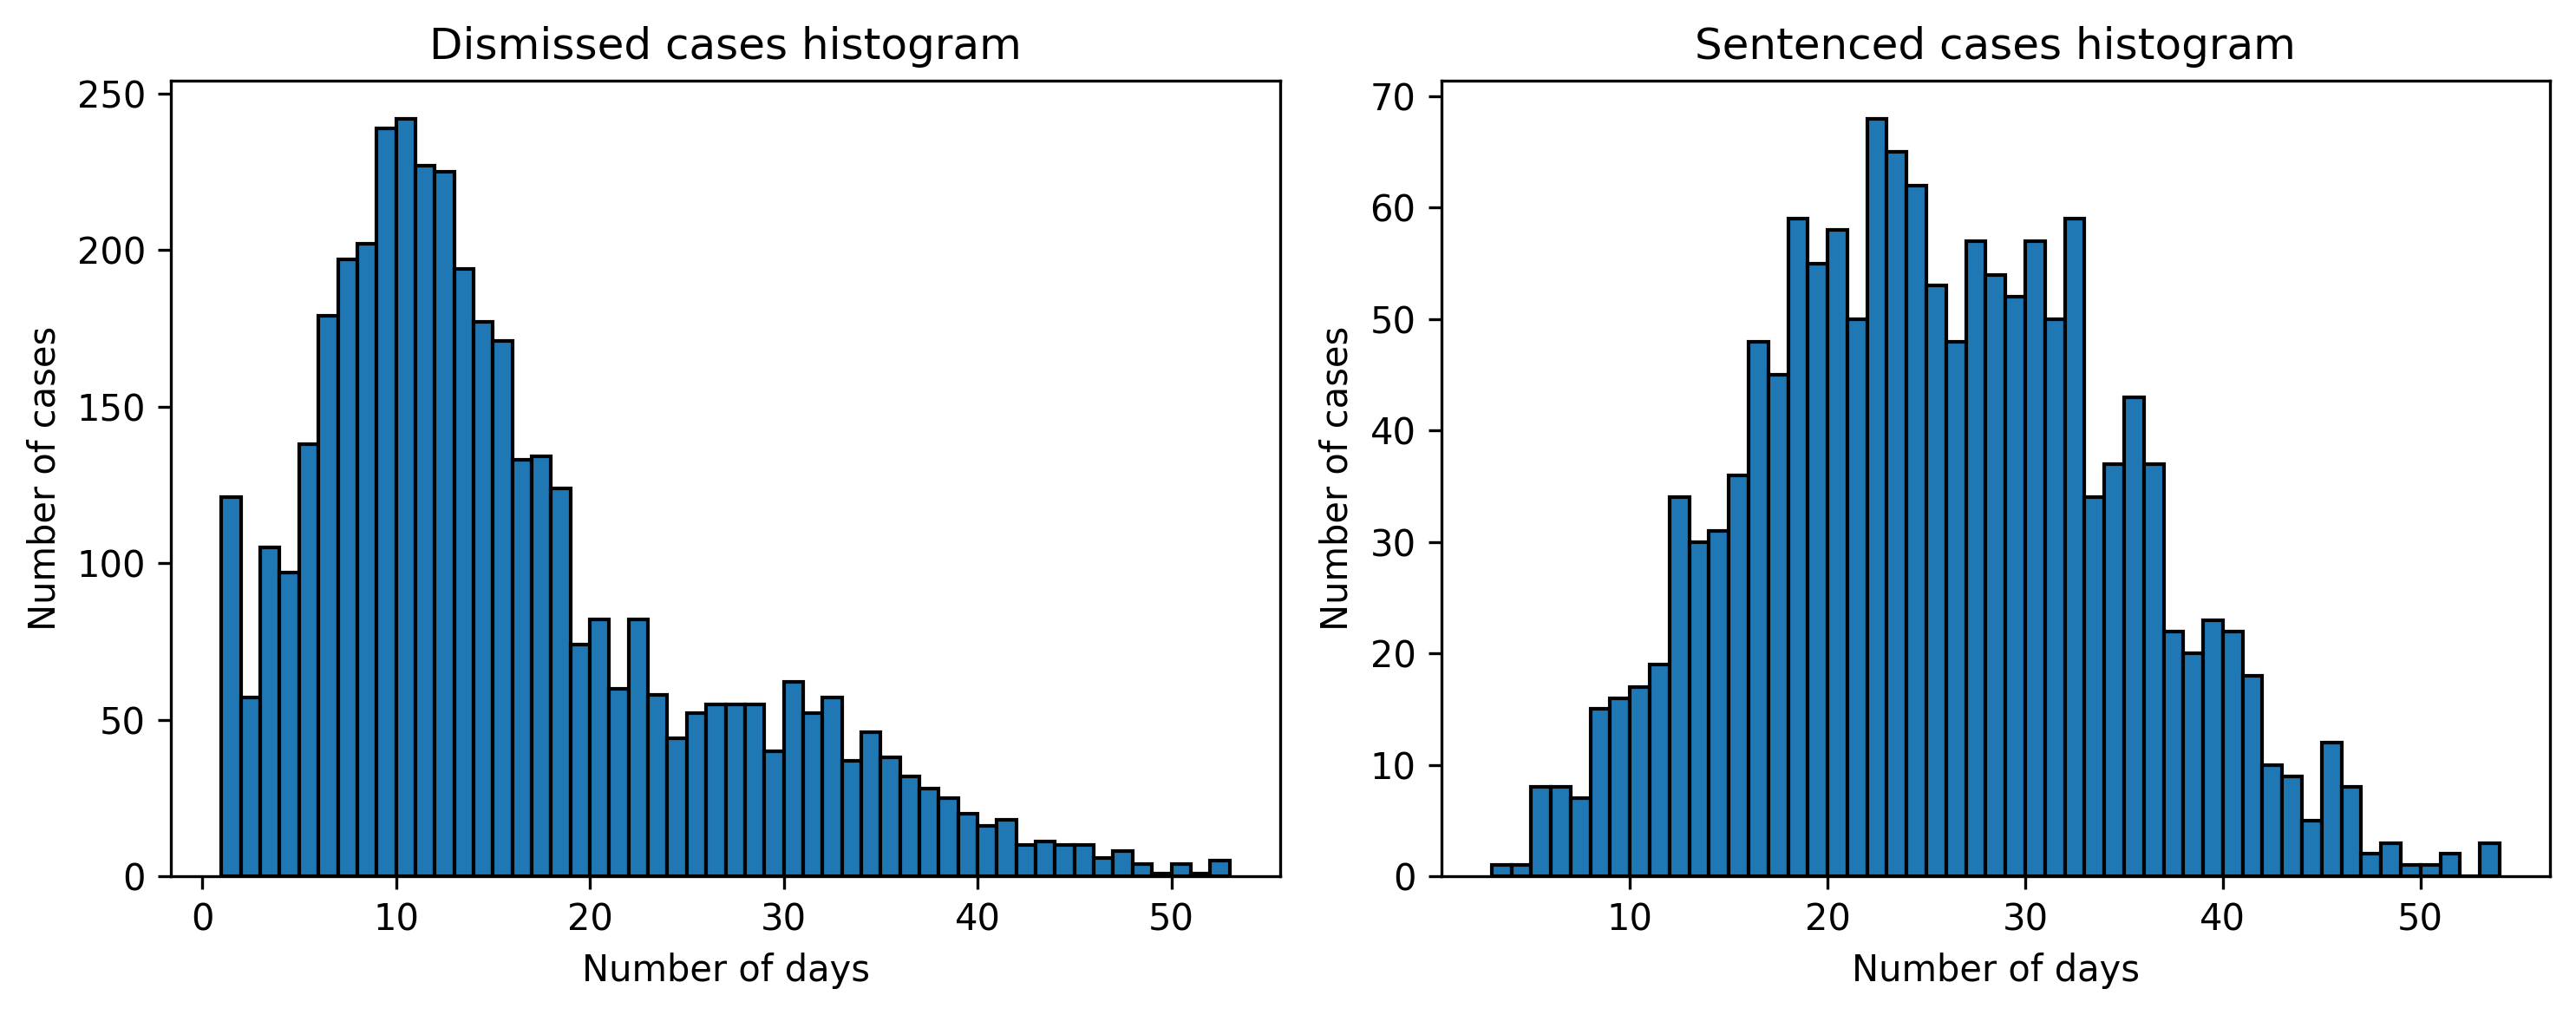

In [6]:
plt.rcParams['figure.dpi'] = 300

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram
axs[0].hist(justice_system.dismissed_list, bins=range(min(justice_system.dismissed_list), max(justice_system.dismissed_list) + 1), edgecolor='black')
axs[0].set_title('Dismissed cases histogram')
axs[0].set_xlabel('Number of days')
axs[0].set_ylabel('Number of cases')

# Plot the second histogram
axs[1].hist(justice_system.sentenced_list, bins=range(min(justice_system.sentenced_list), max(justice_system.sentenced_list) + 1), edgecolor='black')
axs[1].set_title('Sentenced cases histogram')
axs[1].set_xlabel('Number of days')
axs[1].set_ylabel('Number of cases')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Display the plot
plt.show()